In [2]:
import re
import json
import pandas as pd

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

In [3]:
# Cargar datos
path = "C:/Users/dcard/OneDrive/Escritorio/NPL/CRM1.xls"
data = pd.read_excel(path)
data.head()

,Numero de ticket,Ndeorden,Ndeposicion,Categoria,Asunto,Diagnostico,Solucion,ComentarioInterno,Fuente
0,001-00-2667608,10519172,10,3,Zona Demorada,Informar al Distribuidor,Gestionar Queja Atencion SAP,horamaxentrega10:30am//angcru,Teléfono
1,001-00-2667598,19486827,10,1,Información General,Gestionar consulta,Gestionar consulta,tt solicita info tarifa de 900 .. dice que le ...,Teléfono
2,001-00-2667618,16688634,20,5,Condiciones Especiales de Entrega,Distribuidor Notificado,Informar Condiciones Especiales de Entrega,no timbrar dejar donde lo estan haciendo,Teléfono
3,001-00-2667638,19415138,10,4,No Entrega Producto,Falla Distribución (Dirección Correcta),Envio Por Moto,SAC// NO LLEGO 01/03/2021 X MOTO LIDCAL,Teléfono
4,001-00-2667648,10582709,10,3,Zona Demorada,Informar al Distribuidor,Gestionar Queja Atencion SAP,MEDELLIN HORA MAX DE ENTREGA 10:30 AM // KELLOP,Teléfono


In [4]:
import numpy as np

from wordcloud import WordCloud, ImageColorGenerator

from nltk.corpus import stopwords
stopwords = stopwords.words("spanish")

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

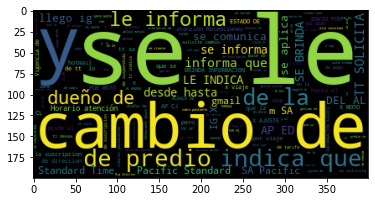

In [5]:
palabras = data.ComentarioInterno.str.cat(sep=" ")
wordcloud = WordCloud().generate(palabras)

plt.imshow(wordcloud)
plt.show()

In [9]:
import re 

# stopwords.append("https")
# stopwords.append("co")

stopwords.extend(["Eastern", "Standar", "Mexico", "Time", "Pacific", "Asesor", "Standard"])

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = [palabra for palabra in texto.split() if palabra not in stopwords]
    texto = " ".join(texto)
    return texto

data['pp'] = data.ComentarioInterno.apply(lambda texto: pre_procesado(texto))

data.head()

,Numero de ticket,Ndeorden,Ndeposicion,Categoria,Asunto,Diagnostico,Solucion,ComentarioInterno,Fuente,pp
0,001-00-2667608,10519172,10,3,Zona Demorada,Informar al Distribuidor,Gestionar Queja Atencion SAP,horamaxentrega10:30am//angcru,Teléfono,horamaxentrega am angcru
1,001-00-2667598,19486827,10,1,Información General,Gestionar consulta,Gestionar consulta,tt solicita info tarifa de 900 .. dice que le ...,Teléfono,tt solicita info tarifa dice dieron mal infoma...
2,001-00-2667618,16688634,20,5,Condiciones Especiales de Entrega,Distribuidor Notificado,Informar Condiciones Especiales de Entrega,no timbrar dejar donde lo estan haciendo,Teléfono,timbrar dejar estan haciendo
3,001-00-2667638,19415138,10,4,No Entrega Producto,Falla Distribución (Dirección Correcta),Envio Por Moto,SAC// NO LLEGO 01/03/2021 X MOTO LIDCAL,Teléfono,sac llego x moto lidcal
4,001-00-2667648,10582709,10,3,Zona Demorada,Informar al Distribuidor,Gestionar Queja Atencion SAP,MEDELLIN HORA MAX DE ENTREGA 10:30 AM // KELLOP,Teléfono,medellin hora max entrega am kellop


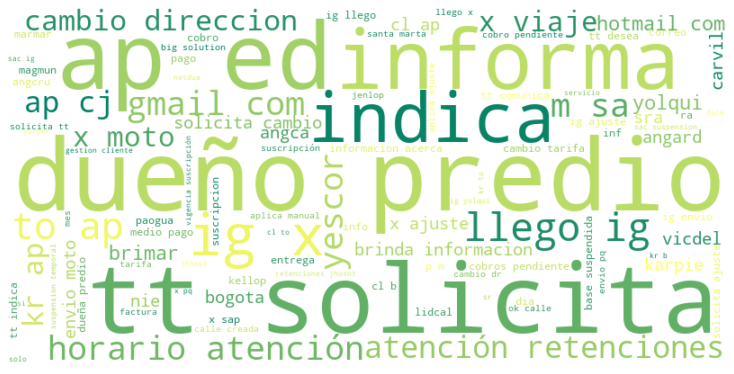

In [10]:
palabras = data.pp.str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="summer",
                      stopwords=stopwords, collocations=True).generate(palabras) 

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()